## Final Project - Predicting Exoplanets Using Transit and Star Types
#### Jude Kappel
#### Prof. Webb
#### CSC-233


##### Imports

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
import math
from sklearn.model_selection import train_test_split
import seaborn as sns
drive.mount('/content/drive')

Mounted at /content/drive


### Introductory Section (Exoplanets)

*  Introducing the data
*  Understanding the underlying data structure
  - What does the data contain?
  - What can the data tell us about exoplanets?



For many years, we have heard a number of rumors, theories, and discourse regarding extraterrestrial life, or life outside of our solar system. One of the main theories is that there are habitable planets that exist outside of our solar system, that humans could someday visit.  These discussions are primarily driven by the scientific community and some "visionary" tech entrepreneurs who believe that life is destined to leave Earth in search of other habitable planets with the capability to sustain the rapidly growing population of an Earth that is nearing its ecological limits.

With the growing interest in extraterrestrial life and habitable planets, it is important to understand the concept of "exoplanets," which are planets that exist outside of our solar system.  A planet with the innate capacity to sustain human life would be a part of this group, since Earth is the only planet within our solar system that has an atmosphere that can sustain life as we know it. Generally, these planets are compared to Earth, as it is the proven standard for a planet with a livable environment.

To find other Earth-like planets, techniques and observational methods were developed by NASA and the astrophysics communities of other nations. Enter the Kepler telescope. This telescope was launched by NASA in 2009 to discover "Earth-like" planets orbiting other stars in a target field of view pictured here:
- 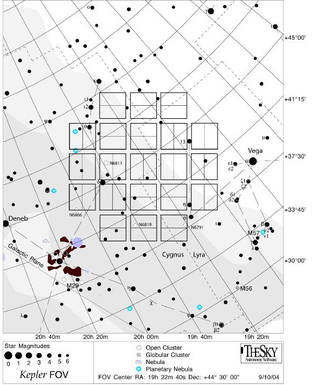

It observed a number of planets around distant stars contained within the Milky Way galaxy, returning a variety of data.  In this project, we will be exploring this data.

In addition to the exoplanet data, we also have a number of observations regarding stars and different star types.  This project aims to analyze this data and come up with a classification algorithim for the star characteristics observed gathered by the Kepler mission and turn these features into predictors of whether a given star type is likely to house a confirmable exoplanet.  Overall, my research question for this project is: "Do stars matter"?

In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/Data/"
star_class = "star.csv"
exoplanet = "exoplanet.csv"

In [ ]:
star_class_df = pd.read_csv(path+star_class)
scr, scc = star_class_df.shape

In [ ]:
print("There are {} rows and {} columns in the star class df".format(scr, scc))

There are 240 rows and 7 columns in the star class df


In [ ]:
exoplanet_df = pd.read_csv(path+exoplanet)
er,ec = exoplanet_df.shape

In [ ]:
print("There are {} rows and {} columns in the exoplanet df".format(er,ec))

There are 9564 rows and 50 columns in the exoplanet df


In [ ]:
star_class_df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [ ]:
exoplanet_df.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [ ]:
exoplanet_df.columns

Index(['rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

In particular, there are a few columns in the exoplanet data that are significant.  "koi_disposition" refers to the exoplanet status (confirmed, candidate, or false positive) from the NASA Exoplanet database (historical), while koi_pdisposition represents the same data but using the results of the Kepler telescope observation. "koi_period" represents the orbital period of the exoplanet (the time it takes to revolve around its respective star). Let's rename some of the columns in this data to be more informative. 

In [ ]:
exoplanet_df.rename(columns = {"koi_disposition": "nasa_exoplanet_status", "koi_pdisposition": "kepler_exoplanet_status",
                               "koi_period":"orbital_period", "koi_impact":"impact_parameter", "koi_duration":"transit_duration",
                               "koi_depth":"transit_depth", "koi_prad": "planetary_radius", "koi_teq": "equilibrium_temperature",
                               "koi_insol":"insolation_flux", "koi_steff": "solar_effective_temp", "koi_slogg":"stellar_surface_gravity",
                               "koi_srad": "solar_radius"}, inplace = True)
exoplanet_df.head()

,rowid,kepid,kepoi_name,kepler_name,nasa_exoplanet_status,kepler_exoplanet_status,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,stellar_surface_gravity,koi_slogg_err1,koi_slogg_err2,solar_radius,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [ ]:
exp_df = exoplanet_df[["nasa_exoplanet_status", "kepler_exoplanet_status", "orbital_period", "impact_parameter",
                       "transit_duration", "transit_depth","planetary_radius","equilibrium_temperature", "insolation_flux", "solar_effective_temp",
                       "stellar_surface_gravity", "solar_radius"]]

In [ ]:
exp_df["log_transit_duration"] = np.log(exp_df["transit_duration"])
exp_df["log_orbital_period"] = np.log(exp_df["orbital_period"])

<ipython-input-12-6eefd4b16902>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_df["log_transit_duration"] = np.log(exp_df["transit_duration"])
<ipython-input-12-6eefd4b16902>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_df["log_orbital_period"] = np.log(exp_df["orbital_period"])


Lets See where the NAs are in this data.  

In [ ]:
exp_df.isna().sum()

nasa_exoplanet_status        0
kepler_exoplanet_status      0
orbital_period               0
impact_parameter           363
transit_duration             0
transit_depth              363
planetary_radius           363
equilibrium_temperature    363
insolation_flux            321
solar_effective_temp       363
stellar_surface_gravity    363
solar_radius               363
log_transit_duration         0
log_orbital_period           0
dtype: int64

According to the above output, 363 out of 9654 instances happen to have NA values. I plan to remove the NA data instead of using the fillna() method.

In [ ]:
exp_df_na = exp_df.dropna()

In [ ]:
exp_df_ncoef = exp_df_na[exp_df_na['nasa_exoplanet_status'] != "CONFIRMED"]
exp_mean = exp_df_ncoef['orbital_period'].mean()
exp_conf = exp_df_na[exp_df_na['nasa_exoplanet_status'] == "CONFIRMED"]
exp_conf_mean = exp_conf['orbital_period'].mean()

In [ ]:
print("The mean orbital period of the unconfirmed exoplanets is: {:.2f} days.".format(exp_mean))
print("The mean orbital period of the confirmed exoplanets is: {:.2f} days.".format(exp_conf_mean))

The mean orbital period of the unconfirmed exoplanets is: 89.98 days.
The mean orbital period of the confirmed exoplanets is: 27.05 days.


Below is a table of descriptive statistics regarding the confirmed exoplanets.  

In [ ]:
exp_conf.describe()

,orbital_period,impact_parameter,transit_duration,transit_depth,planetary_radius,equilibrium_temperature,insolation_flux,solar_effective_temp,stellar_surface_gravity,solar_radius,log_transit_duration,log_orbital_period
count,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000
mean,27.052677,0.426767,4.306581,1141.446335,2.871571,839.125654,350.666139,5477.974258,4.410754,1.066548,1.298152,2.471834
std,54.028035,0.332200,2.720317,2686.208219,3.361129,386.740567,1223.675730,677.133088,0.235333,0.642967,0.563560,1.235903
min,0.341842,0.000000,0.427900,12.200000,0.270000,129.000000,0.070000,2703.000000,2.410000,0.118000,-0.848866,-1.073407
25%,5.082076,0.081000,2.514375,220.650000,1.530000,554.000000,22.205000,5171.000000,4.287000,0.807750,0.922024,1.625720
50%,11.311964,0.392500,3.576500,460.350000,2.170000,781.000000,87.915000,5616.000000,4.455000,0.968000,1.274385,2.425860
75%,25.454658,0.746250,5.304000,896.200000,2.940000,1039.000000,275.117500,5929.500000,4.557000,1.200000,1.668461,3.236898
max,1071.232624,1.300000,24.420000,36912.000000,77.760000,3559.000000,37958.270000,9565.000000,5.274000,19.530000,3.195402,6.976565


here is the table for non-confirmed exoplanets.

In [ ]:
exp_df_ncoef.describe()

,orbital_period,impact_parameter,transit_duration,transit_depth,planetary_radius,equilibrium_temperature,insolation_flux,solar_effective_temp,stellar_surface_gravity,solar_radius,log_transit_duration,log_orbital_period
count,6909.000000,6909.000000,6909.000000,6.909000e+03,6909.000000,6909.000000,6.909000e+03,6909.000000,6909.000000,6909.000000,6909.000000,6909.000000
mean,89.984473,0.837394,6.101916,3.130524e+04,136.072602,1167.080475,1.016020e+04,5782.741931,4.276784,1.948378,1.433389,2.398216
std,1569.482376,3.854475,7.280502,9.369611e+04,3551.070329,948.815690,1.840541e+05,818.816234,0.475819,7.047532,0.823996,2.037518
min,0.241843,0.000000,0.052000,0.000000e+00,0.080000,25.000000,0.000000e+00,2661.000000,0.047000,0.109000,-2.956512,-1.419468
25%,2.080432,0.242000,2.437000,1.427000e+02,1.350000,530.000000,1.873000e+01,5359.000000,4.168000,0.837000,0.890768,0.732575
50%,8.312245,0.579000,3.903000,4.015000e+02,2.600000,942.000000,1.863900e+02,5803.000000,4.437000,1.001000,1.361745,2.117730
75%,45.582712,0.948000,6.815100,2.773700e+03,28.290000,1551.000000,1.370160e+03,6178.000000,4.538000,1.448000,1.919141,3.819529
max,129995.778400,100.806000,138.540000,1.541400e+06,200346.000000,14667.000000,1.094755e+07,15896.000000,5.364000,229.908000,4.931159,11.775257


##What's a Transit? 

Transit is a method used in astronomy that is used to identify exoplanets.  Exoplanets can be observed through this method (not because we can see them) but because when they pass infront of their star, they change the light we observe coming from the star.  The star's light is dimmed because it is blocked by the exoplanet's revolution around that star in relation to us, the observers.  The length of time that the light is dimmed is known as the exoplanet's transit period.

- a particularly interesting thought here is depending on our relative distance from the star, we are actually viewing the transit that occurred potentially millions of years ago.  
- in this sense, based on the theory of relativity, we are time travelers.

Through this method and the observations gathered by the Kepler telescope mission, we have information on exoplanets and their stars, mostly due to observations of the star and features and characteristics related to the stellar object.

In [ ]:
upper_fence_orbital = 25.45 + (1.5 * (25.454658	- 5.082076))
exp_conf_outlier = exp_conf[exp_conf['orbital_period'] < upper_fence_orbital]

upper_fence_orbital_nconf = 45.582712 + (1.5 * (45.582712 - 2.080432))
exp_nconf_outlier = exp_df_ncoef[exp_df_ncoef['orbital_period'] < upper_fence_orbital_nconf]

Lets start with an introductory metric to illustrate the differences between confirmed exoplanets and unconfirmed ones.  The theory is that there will be a significant difference in a number of characteristics that define both groups, which can be used as predictors of whether or not a given observation will be classified as an exoplanet or not.
- Lets start with orbital period.
- orbital period is measured in days.  
  - every celestial object that orbits a star has an orbital period, which can be defined as the time the object takes to perform a full revolution around the object it's revolving around (in most cases the nearest star).
  - Earth's orbital period is around 365 days.

Text(0.5, 1.0, 'Log Orbital Period of Confirmed and Unconfirmed Exoplanets')

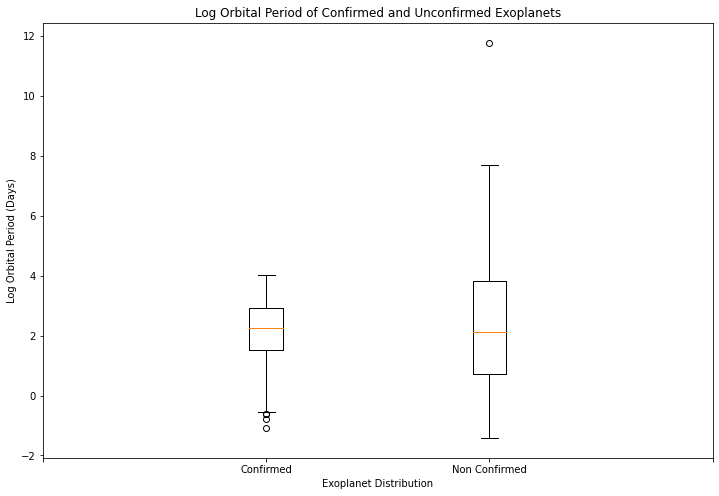

In [ ]:
plt.figure(figsize=(12,8))
plt.boxplot([exp_conf_outlier["log_orbital_period"], exp_df_ncoef["log_orbital_period"]])
plt.ylabel("Log Orbital Period (Days)")
plt.xticks(np.arange(4),["","Confirmed", "Non Confirmed",""])
plt.xlabel("Exoplanet Distribution")
plt.title("Log Orbital Period of Confirmed and Unconfirmed Exoplanets")

Its clear that there are a number of outliers in the data, and inclusion of these outliers will significantly change the statistical interpretations and reporting of descriptive statistics.  It is very necessary to have normalized data when we prepare this data for machine learning analysis, especially considering the use of logged data here.

At any rate, it is clear that the non-confirmed exoplanets (comprised of candidates and false positives) have a much higher variance in terms of their orbital periods than confirmed exoplanets.  

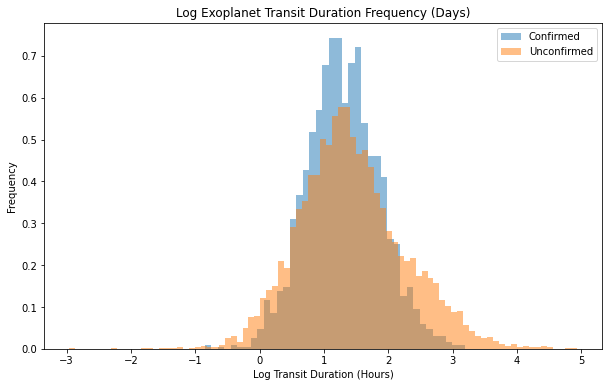

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(exp_conf["log_transit_duration"], bins = 40, density = True, alpha = 0.5, label = "Confirmed")
plt.hist(exp_df_ncoef["log_transit_duration"], bins = 85, density = True, alpha = 0.5, label = "Unconfirmed")
plt.xlabel("Log Transit Duration (Hours)")
plt.ylabel("Frequency")
plt.title("Log Exoplanet Transit Duration Frequency (Days)")
plt.legend()

In [ ]:
print("The average transit duration of confirmed exoplanets is: {:.2f} days.".format(exp_conf["transit_duration"].mean()))
print("The average transit duration of unconfirmed exoplanets is: {:.2f} days.".format(exp_df_ncoef["transit_duration"].mean()))

The average transit duration of confirmed exoplanets is: 4.31 days.
The average transit duration of unconfirmed exoplanets is: 6.10 days.


What if we took a loot at some of the planetary characteristics housed in the data? Let's look at planetary radius. For reference, the Earth's planetary radius is 3,958.8 miles, or  6,378 km (Encyclopedia Britannica).
- Planetary radii are measured in "Earth radii", a standardization method that measures a planet's radius in relation to earth's.  
- Considering this, Earth's radius is 1 Earth radii.

In [ ]:
print("The average planetary radius of confirmed exoplanets is: {:.2f} Earth Radii".format(exp_conf["planetary_radius"].mean()))
print("The average planetary radius of unconfirmed exoplanets is: {:.2f} Earth Radii".format(exp_df_ncoef["planetary_radius"].mean()))

The average planetary radius of confirmed exoplanets is: 2.87 Earth Radii
The average planetary radius of unconfirmed exoplanets is: 136.07 Earth Radii


In [ ]:
print("The standard deviation of confirmed exoplanets planetary radius: {:.2f} Earth Radii".format(exp_conf["planetary_radius"].std()))
print("The standard deviation of planetary radius of unconfirmed exoplanets is: {:.2f} Earth Radii".format(exp_df_ncoef["planetary_radius"].std()))

The standard deviation of confirmed exoplanets planetary radius: 3.36 Earth Radii
The standard deviation of planetary radius of unconfirmed exoplanets is: 3551.07 Earth Radii


On average, a confirmed exoplanet's radius is 2.87 times the radius of Earth, while the unconfirmed exoplanet radius is a whopping 136.07 times the radius of Earth. The planetary radius comparison also fails to reject the hypothesis that unconfirmed objects do NOT have higher variance in their measurements.

- Why could this be?
- the main theory behind this phenomena is that most of these unconfirmed objects are not exoplanets!
- however, there are still a number of celestial objects within this data that are not confirmed yet, so we cannot definitively say that ALL of the unconfirmed exoplanets are definitely not exoplanets, although we do have a number of confirmed "false positives", an object picked up by Kepler but not an exoplanet despite having similar characteristics.

## Star Power

So now that we have a little more context about the characteristics of confirmed exoplanets and unconfirmed objects, let's take a look at the star characteristics of these two groups. According to the analysis above, unconfirmed exoplanets tend to have more variance in observable metrics like orbital period and transit duration than confirmed ones. Stellar characteristics are a little easier to nail down, since NASA classifies stars into a few different types. This might give us some more context about where we are likely to find exoplanets, and therefore increase our chances of finding habitable worlds similar to Earth.

Stellar surface temperature:

In [ ]:
print("Average stellar surface temperature of confirmed exoplanets: {:.2f} Kelvin (K)".format(exp_conf["solar_effective_temp"].mean()))
print("Average stellar surface temperature of unconfirmed exoplanets: {:.2f} Kelvin (K)".format(exp_df_ncoef["solar_effective_temp"].mean()))

Average stellar surface temperature of confirmed exoplanets: 5477.97 Kelvin (K)
Average stellar surface temperature of unconfirmed exoplanets: 5782.74 Kelvin (K)


As far as the variance between Solar effective temperature of the two groups, the average temperature of the stellar object they orbit is similar.  Let's see if we can compare the star characteristics to the star classification data.

According to many astronomical sources of information, the best way to classify a star is by its color and its temperature. Color is measured by a star's luminosity - measured in relation to our sun (a main sequence star), and temperature is measured by, well, temperature!

According to the Data Source:
- Star Type 0: Brown Dwarf
- Star Type 1: Red Dwarf
- Star Type 2: White Dwarf
- Star Type 3: Main Sequence (Solar System Star)
- Star Type 4: Supergiant
- Star Type 5: Hypergiant

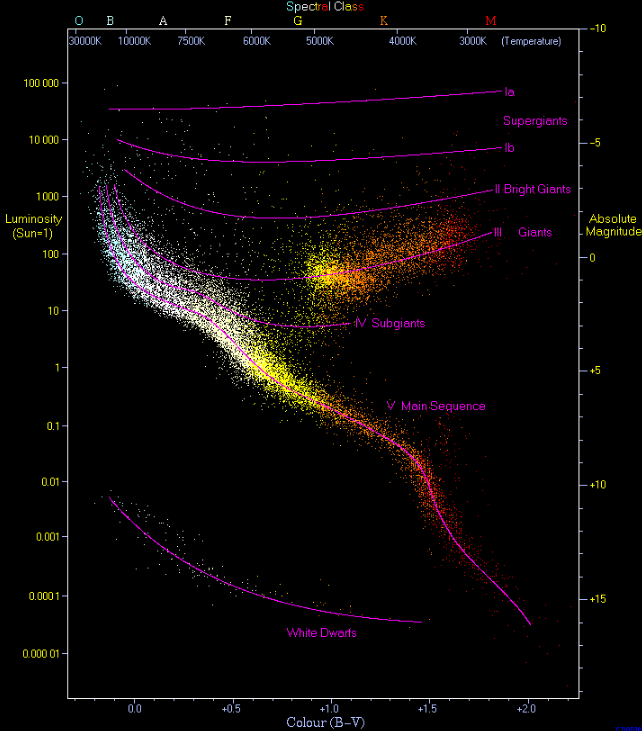

In [ ]:
star_class_df["Star_Class"] = (np.where(star_class_df["Star type"] == 0, "Brown Dwarf", ""))
star_class_df["Star_Class"] = (np.where(star_class_df["Star type"] == 1, "Red Dwarf", star_class_df["Star_Class"]))
star_class_df["Star_Class"] = (np.where(star_class_df["Star type"] == 2, "White Dwarf", star_class_df["Star_Class"]))
star_class_df["Star_Class"] = (np.where(star_class_df["Star type"] == 3, "Main Sequence", star_class_df["Star_Class"]))
star_class_df["Star_Class"] = (np.where(star_class_df["Star type"] == 4, "Supergiant", star_class_df["Star_Class"]))
star_class_df["Star_Class"] = (np.where(star_class_df["Star type"] == 5, "Hypergiant", star_class_df["Star_Class"]))

Below shows the mean values for each star type.

In [ ]:
star_class_df["log_temp"] = np.log(star_class_df["Temperature (K)"])
star_class_df["log_luminosity"] = np.log(star_class_df["Luminosity(L/Lo)"])

In [ ]:
star_class_df.groupby("Star_Class").mean()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,log_temp,log_luminosity
Star_Class,,,,,,,
Brown Dwarf,2997.950,0.000693,0.110015,17.563500,0.0,7.999343,-7.611558
Hypergiant,11405.700,309246.525000,1366.897500,-9.654250,5.0,8.883637,12.465058
Main Sequence,16018.000,32067.386275,4.430300,-0.367425,3.0,9.458547,5.622053
Red Dwarf,3283.825,0.005406,0.348145,12.539975,1.0,8.093338,-5.862307
Supergiant,15347.850,301816.250000,51.150000,-6.369925,4.0,9.372634,12.484801
White Dwarf,13931.450,0.002434,0.010728,12.582500,2.0,9.478436,-7.328963


In [ ]:
brown_dwarf = star_class_df[star_class_df["Star_Class"] == "Brown Dwarf"]
red_dwarf = star_class_df[star_class_df["Star_Class"] == "Red Dwarf"]
white_dwarf = star_class_df[star_class_df["Star_Class"] == "White Dwarf"]
main_sequence = star_class_df[star_class_df["Star_Class"] == "Main Sequence"]
super_giant = star_class_df[star_class_df["Star_Class"] == "Supergiant"]
hypergiant = star_class_df[star_class_df["Star_Class"] == "Hypergiant"]

In [ ]:
print("brown dwarf average temperature: {:.2f} K, std dev: {:.2f}".format(brown_dwarf["Temperature (K)"].mean(),brown_dwarf["Temperature (K)"].std()))
print("red dwarf average temperature: {:.2f} K, std dev: {:.2f}".format(red_dwarf["Temperature (K)"].mean(), red_dwarf["Temperature (K)"].std()))
print("white dwarf average temperature: {:.2f} K, std dev: {:.2f}".format(white_dwarf["Temperature (K)"].mean(), white_dwarf["Temperature (K)"].std()))
print("main sequence average temperature: {:.2f} K, std dev: {:.2f}".format(main_sequence["Temperature (K)"].mean(), main_sequence["Temperature (K)"].std()))
print("supergiant average temperature: {:.2f} K, std dev: {:.2f}".format(super_giant["Temperature (K)"].mean(), super_giant["Temperature (K)"].std()))
print("hypergiant average temperature: {:.2f} K, std dev: {:.2f}".format(hypergiant["Temperature (K)"].mean(), hypergiant['Temperature (K)'].std()))

brown dwarf average temperature: 2997.95 K, std dev: 332.28
red dwarf average temperature: 3283.82 K, std dev: 269.64
white dwarf average temperature: 13931.45 K, std dev: 4957.66
main sequence average temperature: 16018.00 K, std dev: 10661.23
supergiant average temperature: 15347.85 K, std dev: 10086.78
hypergiant average temperature: 11405.70 K, std dev: 11816.99


Plotting the frequency of temperature for each star type.  This is one of the main measures that we will use to identify if an exoplanet orbits a particular star.

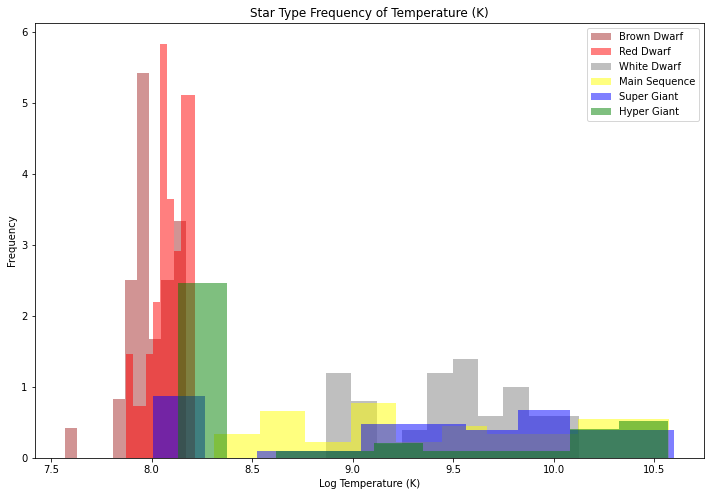

In [ ]:
plt.figure(figsize = (12,8))
plt.hist(brown_dwarf["log_temp"], bins = 10, density = True, alpha = 0.5, label = "Brown Dwarf", color = "brown")
plt.hist(red_dwarf["log_temp"], bins = 10, density = True, alpha = 0.5, label = "Red Dwarf", color = "red")
plt.hist(white_dwarf["log_temp"], bins = 10, density = True, alpha = 0.5, label = "White Dwarf", color = "gray")
plt.hist(main_sequence["log_temp"], bins = 10, density = True, alpha = 0.5, label = "Main Sequence", color = "yellow")
plt.hist(super_giant["log_temp"], bins = 10, density = True, alpha = 0.5, label = "Super Giant", color = "blue")
plt.hist(hypergiant["log_temp"], bins = 10, density = True, alpha = 0.5, label = "Hyper Giant", color = "green")
plt.title("Star Type Frequency of Temperature (K)")
plt.xlabel("Log Temperature (K)")
plt.ylabel("Frequency")
plt.legend()

So as it stands from the above graph, red and brown dwarves are centered around 3000 degrees Kelvin, white dwarves around 13900 Kelvin, main sequence stars around 16000 Kelvin, supergiants around 15300 K, and hypergiants around 11500 Kelvin.  This does not necessarily provide the clearest picture/stratification of these groups so we must look deeper into the differences between the stars to make an accurate prediction.  Lets take a look at luminosity of these different groups. 

In [ ]:
print("brown dwarf average luminosity: {:.5f} K, std dev: {:.5f}".format(brown_dwarf["Luminosity(L/Lo)"].mean(),brown_dwarf["Luminosity(L/Lo)"].std()))
print("red dwarf average luminosity: {:.5f} K, std dev: {:.5f}".format(red_dwarf["Luminosity(L/Lo)"].mean(), red_dwarf["Luminosity(L/Lo)"].std()))
print("white dwarf average luminosity: {:.5f} K, std dev: {:.5f}".format(white_dwarf["Luminosity(L/Lo)"].mean(), white_dwarf["Luminosity(L/Lo)"].std()))
print("main sequence average luminosity: {:.2f} K, std dev: {:.2f}".format(main_sequence["Luminosity(L/Lo)"].mean(), main_sequence["Luminosity(L/Lo)"].std()))
print("supergiant average luminosity: {:.2f} K, std dev: {:.2f}".format(super_giant["Luminosity(L/Lo)"].mean(), super_giant["Luminosity(L/Lo)"].std()))
print("hypergiant average luminosity: {:.2f} K, std dev: {:.2f}".format(hypergiant["Luminosity(L/Lo)"].mean(), hypergiant['Luminosity(L/Lo)'].std()))

brown dwarf average luminosity: 0.00069 K, std dev: 0.00089
red dwarf average luminosity: 0.00541 K, std dev: 0.00733
white dwarf average luminosity: 0.00243 K, std dev: 0.00891
main sequence average luminosity: 32067.39 K, std dev: 69351.20
supergiant average luminosity: 301816.25 K, std dev: 175756.38
hypergiant average luminosity: 309246.53 K, std dev: 199344.00


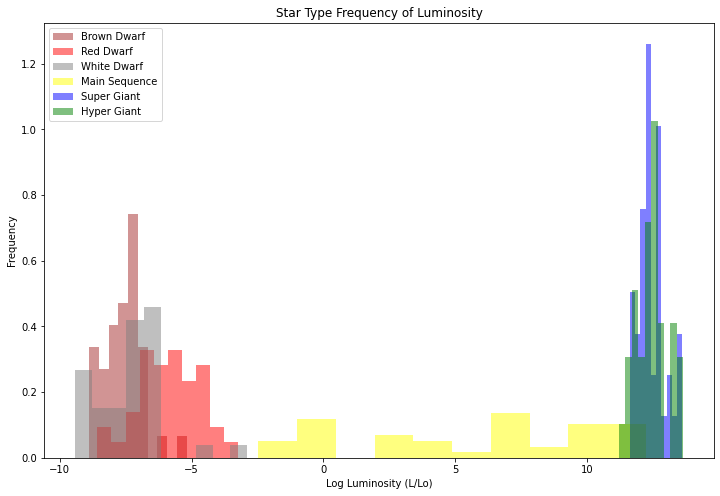

In [ ]:
plt.figure(figsize = (12,8))
plt.hist(brown_dwarf["log_luminosity"], bins = 10, density = True, alpha = 0.5, label = "Brown Dwarf", color = "brown")
plt.hist(red_dwarf["log_luminosity"], bins = 10, density = True, alpha = 0.5, label = "Red Dwarf", color = "red")
plt.hist(white_dwarf["log_luminosity"], bins = 10, density = True, alpha = 0.5, label = "White Dwarf", color = "gray")
plt.hist(main_sequence["log_luminosity"], bins = 10, density = True, alpha = 0.5, label = "Main Sequence", color = "yellow")
plt.hist(super_giant["log_luminosity"], bins = 10, density = True, alpha = 0.5, label = "Super Giant", color = "blue")
plt.hist(hypergiant["log_luminosity"], bins = 10, density = True, alpha = 0.5, label = "Hyper Giant", color = "green")
plt.title("Star Type Frequency of Luminosity")
plt.xlabel("Log Luminosity (L/Lo)")
plt.ylabel("Frequency")
plt.legend()

So above we can see that Luminosity provides a slighly clearer picture into where the different star types fall in relation to one another. 

## Classification and Prediction

In [ ]:
exp_df.head()

,nasa_exoplanet_status,kepler_exoplanet_status,orbital_period,impact_parameter,transit_duration,transit_depth,planetary_radius,equilibrium_temperature,insolation_flux,solar_effective_temp,stellar_surface_gravity,solar_radius,log_transit_duration,log_orbital_period
0,CONFIRMED,CANDIDATE,9.488036,0.146,2.95750,615.8,2.26,793.0,93.59,5455.0,4.467,0.927,1.084344,2.250032
1,CONFIRMED,CANDIDATE,54.418383,0.586,4.50700,874.8,2.83,443.0,9.11,5455.0,4.467,0.927,1.505632,3.996702
2,FALSE POSITIVE,FALSE POSITIVE,19.899140,0.969,1.78220,10829.0,14.60,638.0,39.30,5853.0,4.544,0.868,0.577849,2.990677
3,FALSE POSITIVE,FALSE POSITIVE,1.736952,1.276,2.40641,8079.2,33.46,1395.0,891.96,5805.0,4.564,0.791,0.878136,0.552132
4,CONFIRMED,CANDIDATE,2.525592,0.701,1.65450,603.3,2.75,1406.0,926.16,6031.0,4.438,1.046,0.503499,0.926475


In [ ]:
star_class_grouped = star_class_df.groupby("Star_Class").mean()

In [ ]:
brown_dwarf.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,log_temp,log_luminosity
count,40.000000,40.000000,40.000000,40.000000,40.0,40.000000,40.000000
mean,2997.950000,0.000693,0.110015,17.563500,0.0,7.999343,-7.611558
std,332.276295,0.000888,0.025783,1.213111,0.0,0.116067,0.750343
min,1939.000000,0.000138,0.057000,16.050000,0.0,7.569928,-8.888257
25%,2812.750000,0.000315,0.093150,16.700000,0.0,7.941914,-8.063324
50%,2935.000000,0.000520,0.106000,17.145000,0.0,7.984463,-7.562422
75%,3242.500000,0.000737,0.120250,18.352500,0.0,8.084057,-7.212398
max,3531.000000,0.005600,0.190000,20.060000,0.0,8.169336,-5.184989


In [ ]:
red_dwarf.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,log_temp,log_luminosity
count,40.000000,40.000000,40.000000,40.000000,40.0,40.000000,40.000000
mean,3283.825000,0.005406,0.348145,12.539975,1.0,8.093338,-5.862307
std,269.637258,0.007330,0.154453,1.422816,0.0,0.084759,1.191135
min,2621.000000,0.000190,0.098000,10.120000,1.0,7.871311,-8.568486
25%,3132.750000,0.001315,0.240000,11.367500,1.0,8.049666,-6.633940
50%,3314.000000,0.003150,0.338000,12.605000,1.0,8.105907,-5.763512
75%,3527.500000,0.006675,0.409750,13.564250,1.0,8.168342,-5.010383
max,3692.000000,0.039000,0.730000,14.940000,1.0,8.213924,-3.244194


In [ ]:
main_sequence.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,log_temp,log_luminosity
count,40.000000,40.000000,40.00000,40.000000,40.0,40.000000,40.000000
mean,16018.000000,32067.386275,4.43030,-0.367425,3.0,9.458547,5.622053
std,10661.234972,69351.195858,2.80139,3.613592,0.0,0.686853,4.611331
min,4077.000000,0.085000,0.79500,-4.700000,3.0,8.313117,-2.465104
25%,7479.250000,6.297500,1.28750,-3.702500,3.0,8.918261,1.641462
50%,12560.500000,738.500000,5.71250,-1.180000,3.0,9.437634,6.602370
75%,23030.000000,12962.500000,6.36750,2.425000,3.0,10.043293,9.467583
max,39000.000000,204000.000000,10.60000,6.506000,3.0,10.571317,12.225875


In [ ]:
super_giant.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,log_temp,log_luminosity
count,40.000000,40.000000,40.000000,40.000000,40.0,40.000000,40.000000
mean,15347.850000,301816.250000,51.150000,-6.369925,4.0,9.372634,12.484801
std,10086.784628,175756.378119,27.656826,0.560051,0.0,0.799436,0.503041
min,3008.000000,112000.000000,12.000000,-7.450000,4.0,8.009031,11.626254
25%,6899.500000,197250.000000,25.750000,-6.807500,4.0,8.834196,12.192205
50%,12821.000000,242145.000000,43.500000,-6.235000,4.0,9.458824,12.397253
75%,23181.250000,344160.000000,80.250000,-5.961250,4.0,10.051078,12.748843
max,40000.000000,813000.000000,98.000000,-5.240000,4.0,10.596635,13.608486


In [ ]:
hypergiant.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,log_temp,log_luminosity
count,40.000000,40.000000,40.000000,40.000000,40.0,40.000000,40.000000
mean,11405.700000,309246.525000,1366.897500,-9.654250,5.0,8.883637,12.465058
std,11816.991886,199343.999427,255.561357,1.453605,0.0,0.920461,0.595335
min,3399.000000,74000.000000,708.900000,-11.920000,5.0,8.131237,11.211820
25%,3603.750000,173000.000000,1193.000000,-10.875000,5.0,8.189730,12.060996
50%,3766.000000,266500.000000,1352.500000,-9.915000,5.0,8.233762,12.493043
75%,18976.000000,365957.500000,1525.000000,-8.147500,5.0,9.847201,12.810176
max,38940.000000,849420.000000,1948.500000,-7.580000,5.0,10.569777,13.652309


My goal is to look at the characteristics of the stars that the planets orbit and see if I can classify the star an exoplanet orbits into one of the 5 main star types mentioned above.

In [ ]:
def output_iqr(array):
  pct_75 = np.percentile(array, 75)
  pct_25 = np.percentile(array, 25)
  return pct_75, pct_25


bd_tem_75, bd_tem_25 = output_iqr(brown_dwarf["Temperature (K)"])
bd_lum_75, bd_lum_25 = output_iqr(brown_dwarf["Luminosity(L/Lo)"])
bd_rad_75, bd_rad_25 = output_iqr(brown_dwarf["Radius(R/Ro)"])
bd_amag_75, bd_amag_25 = output_iqr(brown_dwarf["Absolute magnitude(Mv)"])

rd_tem_75, rd_tem_25 = output_iqr(red_dwarf["Temperature (K)"])
rd_lum_75, rd_lum_25 = output_iqr(red_dwarf["Luminosity(L/Lo)"])
rd_rad_75, rd_rad_25 = output_iqr(red_dwarf["Radius(R/Ro)"])
rd_amag_75, rd_amag_25 = output_iqr(red_dwarf["Absolute magnitude(Mv)"])

wd_tem_75, wd_tem_25 = output_iqr(white_dwarf["Temperature (K)"])
wd_lum_75, wd_lum_25 = output_iqr(white_dwarf["Luminosity(L/Lo)"])
wd_rad_75, wd_rad_25 = output_iqr(white_dwarf["Radius(R/Ro)"])
wd_amag_75, wd_amag_25 = output_iqr(white_dwarf["Absolute magnitude(Mv)"])

ms_tem_75, ms_tem_25 = output_iqr(main_sequence["Temperature (K)"])
ms_lum_75, ms_lum_25 = output_iqr(main_sequence["Luminosity(L/Lo)"])
ms_rad_75, ms_rad_25 = output_iqr(main_sequence["Radius(R/Ro)"])
ms_amag_75, ms_amag_25 = output_iqr(main_sequence["Absolute magnitude(Mv)"])

sg_tem_75, sg_tem_25 = output_iqr(super_giant["Temperature (K)"])
sg_lum_75, sg_lum_25 = output_iqr(super_giant["Luminosity(L/Lo)"])
sg_rad_75, sg_rad_25 = output_iqr(super_giant["Radius(R/Ro)"])
sg_amag_75, sg_amag_25 = output_iqr(super_giant["Absolute magnitude(Mv)"])

hg_tem_75, hg_tem_25 = output_iqr(hypergiant["Temperature (K)"])
hg_lum_75, hg_lum_25 = output_iqr(hypergiant["Luminosity(L/Lo)"])
hg_rad_75, hg_rad_25 = output_iqr(hypergiant["Radius(R/Ro)"])
hg_amag_75, hg_amag_25 = output_iqr(hypergiant["Absolute magnitude(Mv)"])

col_list = ["Temperature (K)", "Luminosity(L/Lo)", "Radius(R/Ro)", "Absolute magnitude(Mv)"]

# def get_iqr(df):
#   for col in df[col_list]:
#     return output_iqr(col)

# bd_tem_75, bd_tem_25, bd_lum_75, bd_lum_25, bd_rad_75, bd_rad_25, bd_amag_75, bd_amag_25 = get_iqr(brown_dwarf)

Classifying Stars in the exoplanet dataframe:

- now for the tricky part.  Here I plan to use where the star measurement falls in the exoplanet dataframe, compared to the data gathered on different star types in the star classification data.  I plan to use this measure as a predictor for exoplanet presence around a particular star.



In [ ]:
exp_df["Star_type"] = ""
for i in range(len(exp_df)):
  temp = exp_df.loc[i, "solar_effective_temp"]
  radi = exp_df.loc[i, "solar_radius"]
  if temp >= bd_tem_25 and temp <= bd_tem_75 and radi >= bd_rad_25 and radi <= bd_rad_75:
    exp_df.loc[i, "Star_type"] == "brown dwarf" #brown dwarf, saving hassle of preprocessing later
  elif temp >= rd_tem_25 and temp <= rd_tem_75 and radi >= rd_rad_25 and radi <= rd_rad_75:
      exp_df.loc[i, 'Star_type'] = 'red dwarf'
  elif temp >= wd_tem_25 and temp <= wd_tem_75 and radi >= wd_rad_25 and radi <= wd_rad_75:
      exp_df.loc[i, 'Star_type'] = 'white dwarf'
  elif temp >= ms_tem_25 and temp <= ms_tem_75 and radi >= ms_rad_25 and radi <= ms_rad_75:
      exp_df.loc[i, 'Star_type'] = 'main sequence'
  elif temp >= sg_tem_25 and temp <= sg_tem_75 and radi >= sg_rad_25 and radi <= sg_rad_75:
      exp_df.loc[i, 'Star_type'] = 'supergiant'
  elif temp >= hg_tem_25 and temp <= hg_tem_75 and radi >= hg_rad_25 and radi <= hg_rad_75:
      exp_df.loc[i, 'Star_type'] = 'hypergiant'
  else:
    exp_df.loc[i, 'Star_type'] = 'unknown'

<ipython-input-43-1f73224bf3ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_df["Star_type"] = ""


In [ ]:
exp_df["Star_type"].value_counts()

unknown          9357
main sequence     178
red dwarf          29
Name: Star_type, dtype: int64

In [ ]:
exp_df.groupby(["nasa_exoplanet_status","Star_type"]).mean()

orbital_period  impact_parameter  \
nasa_exoplanet_status Star_type                                         
CANDIDATE             main sequence       74.953268          0.531831   
                      red dwarf          103.162667          0.613850   
                      unknown            130.921600          0.536910   
CONFIRMED             main sequence       12.658844          0.524000   
                      red dwarf           15.587225          0.455167   
                      unknown             27.136278          0.426532   
FALSE POSITIVE        main sequence       51.520546          1.427288   
                      red dwarf           94.571656          4.517127   
                      unknown             73.996531          0.951577   

                                     transit_duration  transit_depth  \
nasa_exoplanet_status Star_type                                        
CANDIDATE             main sequence          6.673748    5735.769231   
                      red dwarf              3.746450     865.816667   
                      unknown                4.819533    1843.768236   
CONFIRMED             main sequence          5.234385    2342.900000   
                      red dwarf              1.846458    1401.391667   
                      unknown                4.320776    1139.022169   
FALSE POSITIVE        main sequence          7.614015   91411.528221   
                      red dwarf              4.631965   59522.518182   
                      unknown                6.545959   43221.911626   

                                     planetary_radius  \
nasa_exoplanet_status Star_type                         
CANDIDATE             main sequence         20.169231   
                      red dwarf              2.260000   
                      unknown               15.943901   
CONFIRMED             main sequence         11.875000   
                      red dwarf              1.310000   
                      unknown                2.871892   
FALSE POSITIVE        main sequence        243.102699   
                      red dwarf            121.019091   
                      unknown              189.968881   

                                     equilibrium_temperature  insolation_flux  \
nasa_exoplanet_status Star_type                                                 
CANDIDATE             main sequence              2370.461538     52068.227692   
                      red dwarf                   500.833333        41.190000   
                      unknown                     874.546168      5091.515598   
CONFIRMED             main sequence              2470.000000     19408.950000   
                      red dwarf                   405.166667        11.705833   
                      unknown                     839.979807       335.719236   
FALSE POSITIVE        main sequence              2551.950920     30110.002454   
                      red dwarf                   467.454545        43.500909   
                      unknown                    1255.859560     11799.447441   

                                     solar_effective_temp  \
nasa_exoplanet_status Star_type                             
CANDIDATE             main sequence           8515.461538   
                      red dwarf               3427.333333   
                      unknown                 5628.635734   
CONFIRMED             main sequence           9336.000000   
                      red dwarf               3473.583333   
                      unknown                 5485.145742   
FALSE POSITIVE        main sequence           8547.668712   
                      red dwarf               3420.636364   
                      unknown                 5758.060879   

                                     stellar_surface_gravity  solar_radius  \
nasa_exoplanet_status Star_type                                              
CANDIDATE             main sequence                 3.750615      3.420538   
              

So sadly it looks like we were not able to accurately classify most of the stars the exoplanets orbit based on the limited information provided by the Kepler data.  However, we do have the observations regarding the stellar object, and while we cannot say (for the most part) what type of star it is, we still have a number of quantitative observations about the stellar object.  These features can be useful in predicting whether an exoplanet will exist around *particular star characteristics*, but we will just not be able to say if the star is a main sequence, supergiant, etc.

Now its time for prediction.  Let's split up the data into X and y sets and perform some baseline metrics.  I plan to use NASA's confirmed exoplanets as the y feature, and another model using Kepler's candidates as y feature.

In [ ]:
exp_df

,nasa_exoplanet_status,kepler_exoplanet_status,orbital_period,impact_parameter,transit_duration,transit_depth,planetary_radius,equilibrium_temperature,insolation_flux,solar_effective_temp,stellar_surface_gravity,solar_radius,log_transit_duration,log_orbital_period,Star_type
0,CONFIRMED,CANDIDATE,9.488036,0.146,2.95750,615.8,2.26,793.0,93.59,5455.0,4.467,0.927,1.084344,2.250032,unknown
1,CONFIRMED,CANDIDATE,54.418383,0.586,4.50700,874.8,2.83,443.0,9.11,5455.0,4.467,0.927,1.505632,3.996702,unknown
2,FALSE POSITIVE,FALSE POSITIVE,19.899140,0.969,1.78220,10829.0,14.60,638.0,39.30,5853.0,4.544,0.868,0.577849,2.990677,unknown
3,FALSE POSITIVE,FALSE POSITIVE,1.736952,1.276,2.40641,8079.2,33.46,1395.0,891.96,5805.0,4.564,0.791,0.878136,0.552132,unknown
4,CONFIRMED,CANDIDATE,2.525592,0.701,1.65450,603.3,2.75,1406.0,926.16,6031.0,4.438,1.046,0.503499,0.926475,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,FALSE POSITIVE,FALSE POSITIVE,8.589871,0.765,4.80600,87.7,1.11,929.0,176.40,5638.0,4.296,1.088,1.569865,2.150584,unknown
9560,FALSE POSITIVE,FALSE POSITIVE,0.527699,1.252,3.22210,1579.2,29.35,2088.0,4500.53,5638.0,4.529,0.903,1.170033,-0.639230,unknown
9561,CANDIDATE,CANDIDATE,1.739849,0.043,3.11400,48.5,0.72,1608.0,1585.81,6119.0,4.444,1.031,1.135908,0.553799,unknown
9562,FALSE POSITIVE,FALSE POSITIVE,0.681402,0.147,0.86500,103.6,1.07,2218.0,5713.41,6173.0,4.447,1.041,-0.145026,-0.383603,unknown


In [ ]:
exp_df.dropna(inplace=True)

<ipython-input-47-2ee2cbc69e32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_df.dropna(inplace=True)


In [ ]:
exp_df["nasa_status"] = np.where(exp_df["nasa_exoplanet_status"] == "CONFIRMED", 1, 0)
nasa_status = exp_df["nasa_status"]
exp_df["kepler_status"] = np.where(exp_df["kepler_exoplanet_status"] == "CANDIDATE", 1, 0)
kepler_status = exp_df["kepler_status"]


<ipython-input-48-ebf2310334aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_df["nasa_status"] = np.where(exp_df["nasa_exoplanet_status"] == "CONFIRMED", 1, 0)
<ipython-input-48-ebf2310334aa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_df["kepler_status"] = np.where(exp_df["kepler_exoplanet_status"] == "CANDIDATE", 1, 0)


In [ ]:
X = exp_df.drop(['nasa_exoplanet_status', "kepler_exoplanet_status", "Star_type", "nasa_status", "kepler_status"], axis = 1) 
y = nasa_status
y_kep = kepler_status
X

,orbital_period,impact_parameter,transit_duration,transit_depth,planetary_radius,equilibrium_temperature,insolation_flux,solar_effective_temp,stellar_surface_gravity,solar_radius,log_transit_duration,log_orbital_period
0,9.488036,0.146,2.95750,615.8,2.26,793.0,93.59,5455.0,4.467,0.927,1.084344,2.250032
1,54.418383,0.586,4.50700,874.8,2.83,443.0,9.11,5455.0,4.467,0.927,1.505632,3.996702
2,19.899140,0.969,1.78220,10829.0,14.60,638.0,39.30,5853.0,4.544,0.868,0.577849,2.990677
3,1.736952,1.276,2.40641,8079.2,33.46,1395.0,891.96,5805.0,4.564,0.791,0.878136,0.552132
4,2.525592,0.701,1.65450,603.3,2.75,1406.0,926.16,6031.0,4.438,1.046,0.503499,0.926475
...,...,...,...,...,...,...,...,...,...,...,...,...
9559,8.589871,0.765,4.80600,87.7,1.11,929.0,176.40,5638.0,4.296,1.088,1.569865,2.150584
9560,0.527699,1.252,3.22210,1579.2,29.35,2088.0,4500.53,5638.0,4.529,0.903,1.170033,-0.639230
9561,1.739849,0.043,3.11400,48.5,0.72,1608.0,1585.81,6119.0,4.444,1.031,1.135908,0.553799
9562,0.681402,0.147,0.86500,103.6,1.07,2218.0,5713.41,6173.0,4.447,1.041,-0.145026,-0.383603


In [ ]:
scaler = MinMaxScaler()
mm = scaler.fit(X)
scaled_data = mm.transform(X)

x_norm = pd.DataFrame(scaled_data, columns = X.columns)

x_norm

,orbital_period,impact_parameter,transit_duration,transit_depth,planetary_radius,equilibrium_temperature,insolation_flux,solar_effective_temp,stellar_surface_gravity,solar_radius,log_transit_duration,log_orbital_period
0,0.000071,0.001448,0.020980,0.000400,0.000011,0.052452,8.548941e-06,0.211107,0.831296,0.003560,0.512300,0.278104
1,0.000417,0.005813,0.032169,0.000568,0.000014,0.028548,8.321493e-07,0.211107,0.831296,0.003560,0.565711,0.410480
2,0.000151,0.009613,0.012494,0.007025,0.000072,0.041866,3.589843e-06,0.241179,0.845778,0.003303,0.448087,0.334235
3,0.000012,0.012658,0.017001,0.005241,0.000167,0.093566,8.147573e-05,0.237552,0.849539,0.002968,0.486157,0.149423
4,0.000018,0.006954,0.011571,0.000391,0.000013,0.094318,8.459972e-05,0.254628,0.825842,0.004077,0.438661,0.177794
...,...,...,...,...,...,...,...,...,...,...,...,...
9196,0.000064,0.007589,0.034328,0.000057,0.000005,0.061740,1.611319e-05,0.224934,0.799135,0.004260,0.573855,0.270567
9197,0.000002,0.012420,0.022891,0.001025,0.000146,0.140896,4.110991e-04,0.224934,0.842957,0.003455,0.523164,0.059133
9198,0.000012,0.000427,0.022110,0.000031,0.000003,0.108114,1.448552e-04,0.261277,0.826970,0.004012,0.518838,0.149550
9199,0.000003,0.001458,0.005871,0.000067,0.000005,0.149775,5.218892e-04,0.265357,0.827534,0.004056,0.356441,0.078506


Text(0.5, 1.0, 'Correlation Matrix')

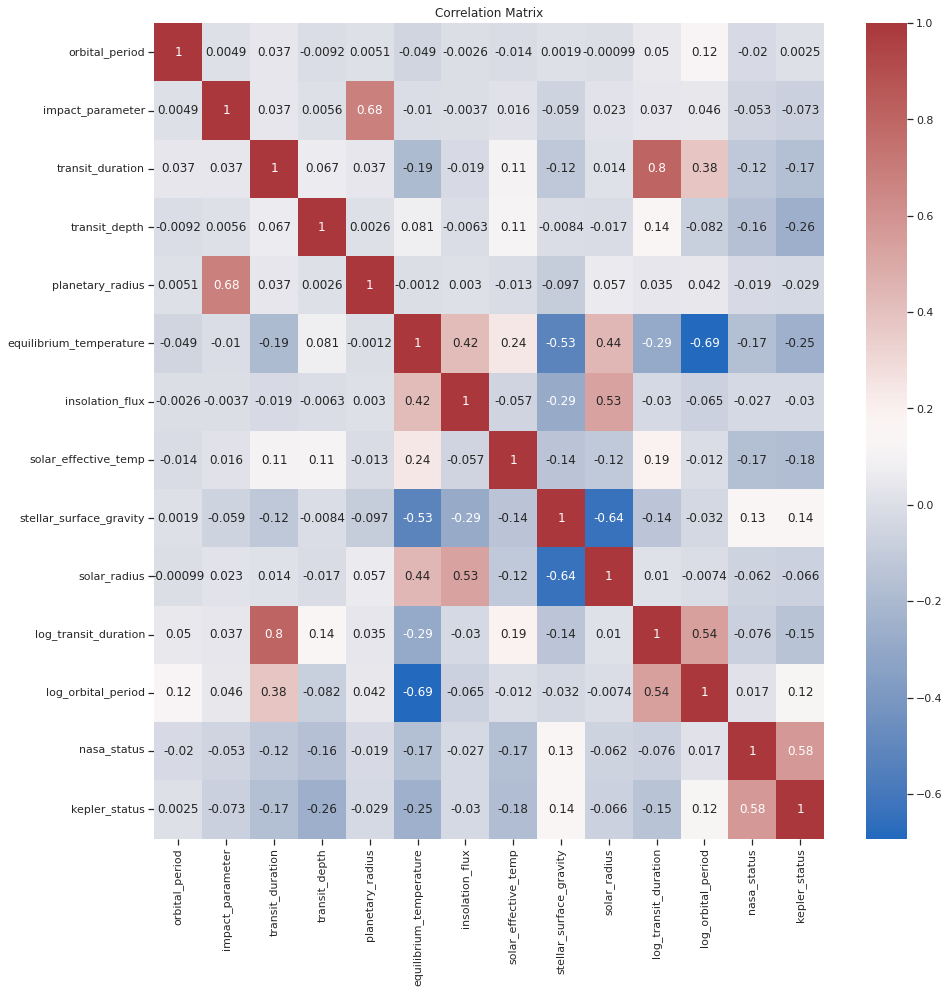

In [ ]:

plt.figure(figsize=(15,15))
sns.set(style="ticks")
sns.heatmap(exp_df.corr(),annot=True,cmap='vlag');
plt.title("Correlation Matrix")

Some of the biggest data points for correlation: 
- stellar surface gravity is highly correlated with solar radius - this seems self explanatory
- log orbital period is negatively correlated with equilibrium temperature: This makes sense- the higher the orbital period, the farther away from the star, leading to lower surface temperature

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size = 0.33)

ZeroR with Resubstitution Error:

In [ ]:
zr = DummyClassifier()
zeroR = zr.fit(x_norm, y)
zr_predY = zeroR.predict(x_norm)

zr_acc = accuracy_score(y, zr_predY)
print("ZeroR accuracy {:.2f}".format(zr_acc))

xdata = x_norm.values
zr_cv = cross_val_score(zr, xdata, y, cv = 10, scoring = 'accuracy')
print("{}: {:.2f}% ({:.2f})".format("ZR Average CV Score", zr_cv.mean()*100, zr_cv.std()))

ZeroR accuracy 0.75
ZR Average CV Score: 75.09% (0.00)


ZeroR with training and testing sets:

In [ ]:
zr = DummyClassifier()
zeroR = zr.fit(x_train, y_train)
zr_predY = zeroR.predict(x_test)

zr_acc = accuracy_score(y_test, zr_predY)
print("ZeroR accuracy {:.2f}".format(zr_acc))

xdata = x_norm.values
zr_cv = cross_val_score(zr, xdata, y, cv = 10, scoring = 'accuracy')
print("{}: {:.2f}% ({:.2f})".format("ZR Average CV Score", zr_cv.mean()*100, zr_cv.std()))

ZeroR accuracy 0.75
ZR Average CV Score: 75.09% (0.00)


Neural Network Training and validation:

In [ ]:
X.isna().any().sum()

0

In [ ]:
mlp = MLPClassifier(max_iter = 500)
neural_net = mlp.fit(x_norm, y)
nn_predY = mlp.predict(x_norm)

nn_acc = accuracy_score(y, nn_predY)
print("Neural Network accuracy {:.2f}%".format(zr_acc))

xdata = x_norm.values
nn_cv = cross_val_score(mlp, xdata, y, cv = 10, scoring = 'accuracy')
print("{}: {:.2f}% ({:.2f})".format("NN Average CV Score", nn_cv.mean()*100, nn_cv.std()))

Neural Network accuracy 0.75%
NN Average CV Score: 80.46% (0.05)


The neural network performs slightly better than the dummyclassifier.

In [ ]:
mlp = MLPClassifier(solver = "adam", max_iter = 500, learning_rate_init=0.01)
neural_net = mlp.fit(x_train, y_train)
nn_predY = mlp.predict(x_test)

nn_acc = accuracy_score(y_test, nn_predY)
print("Neural Network accuracy {:.2f}%".format(zr_acc))

xdata = x_norm.values
nn_cv = cross_val_score(mlp, xdata, y, cv = 10, scoring = 'accuracy')
print("{}: {:.2f}% ({:.2f})".format("NN Average CV Score", nn_cv.mean()*100, nn_cv.std()))

Neural Network accuracy 0.75%
NN Average CV Score: 80.92% (0.04)


Let's plot the accuracy of the neural network via a confusion matrix.

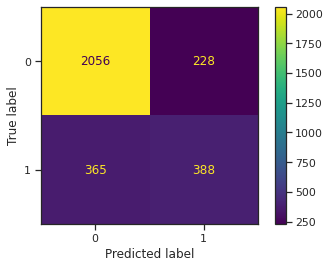

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, nn_predY, labels=neural_net.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=neural_net.classes_)
disp.plot();

According to the plot, the neural network achieved an accuracy of 80.05 percent.  The model accurately predicted 1989 false positives/unconfirmed exoplanets correctly, and 446 exoplanets that are actually exoplanets according to the NASA data.  The model incorrectly predicted 293 exoplanets that are actually not exoplanets, and incorrectly classified 309 actual exoplanets as false positives/unconfirmed exoplanets.   

Plotting a ROC curve (performance validation)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, nn_predY)
auc = roc_auc_score(y_test, nn_predY)

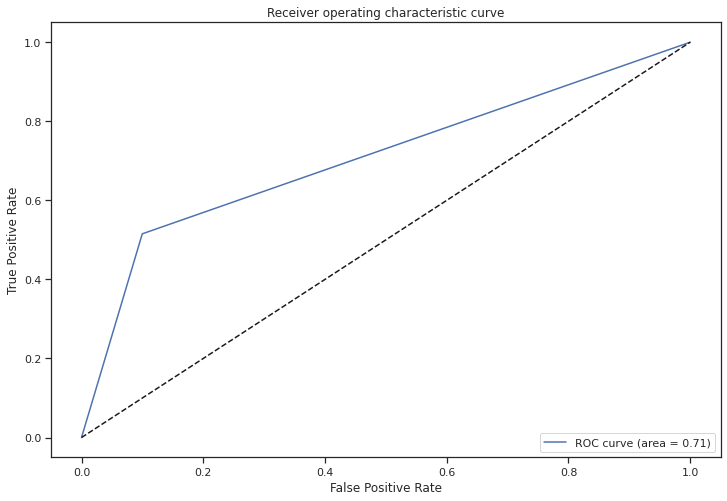

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve, NASA Archive Data')
plt.legend(loc="lower right")
plt.show()

The ROC curve indicates that the overall performance of the model is pretty good. Where a random classifier would have an AUC of 0.5, the model above has a value of 0.72.

### Kepler Y_Values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_norm, y_kep, test_size = 0.33)

ZeroR with Resubstitution Error:

In [ ]:
y_kep.value_counts()

0    4768
1    4433
Name: kepler_status, dtype: int64

In [ ]:
zr = DummyClassifier()
zeroR = zr.fit(x_norm, y_kep)
zr_predY = zeroR.predict(x_norm)

zr_acc = accuracy_score(y_kep, zr_predY)
print("ZeroR accuracy {:.2f}".format(zr_acc))

xdata = x_norm.values
zr_cv = cross_val_score(zr, xdata, y_kep, cv = 10, scoring = 'accuracy')
print("{}: {:.2f}% ({:.2f})".format("ZR Average CV Score", zr_cv.mean()*100, zr_cv.std()))

ZeroR accuracy 0.52
ZR Average CV Score: 51.82% (0.00)


ZeroR with training and testing sets:

In [ ]:
zr = DummyClassifier()
zeroR = zr.fit(x_train, y_train)
zr_predY = zeroR.predict(x_test)

zr_acc = accuracy_score(y_test, zr_predY)
print("ZeroR accuracy {:.2f}".format(zr_acc))

xdata = x_norm.values
zr_cv = cross_val_score(zr, xdata, y_kep, cv = 10, scoring = 'accuracy')
print("{}: {:.2f}% ({:.2f})".format("ZR Average CV Score", zr_cv.mean()*100, zr_cv.std()))

ZeroR accuracy 0.52
ZR Average CV Score: 51.82% (0.00)


Neural Network Training and validation:

In [ ]:
X.isna().any().sum()

0

In [ ]:
mlp = MLPClassifier(max_iter = 500)
neural_net = mlp.fit(x_norm, y_kep)
nn_predY = mlp.predict(x_norm)

nn_acc = accuracy_score(y_kep, nn_predY)
print("Neural Network accuracy {:.2f}%".format(zr_acc))

xdata = x_norm.values
nn_cv = cross_val_score(mlp, xdata, y_kep, cv = 10, scoring = 'accuracy')
print("{}: {:.2f}% ({:.2f})".format("NN Average CV Score", nn_cv.mean()*100, nn_cv.std()))

Neural Network accuracy 0.52%
NN Average CV Score: 78.97% (0.05)


The neural network performs much better than the dummyclassifier.

In [ ]:
mlp = MLPClassifier(solver = "adam", max_iter = 500, learning_rate_init=0.01)
neural_net = mlp.fit(x_train, y_train)
nn_predY = mlp.predict(x_test)

nn_acc = accuracy_score(y_test, nn_predY)
print("Neural Network accuracy {:.2f}%".format(zr_acc))

xdata = x_norm.values
nn_cv = cross_val_score(mlp, xdata, y_kep, cv = 10, scoring = 'accuracy')
print("{}: {:.2f}% ({:.2f})".format("NN Average CV Score", nn_cv.mean()*100, nn_cv.std()))

Neural Network accuracy 0.52%
NN Average CV Score: 79.23% (0.05)


Let's plot the accuracy of the neural network via a confusion matrix.

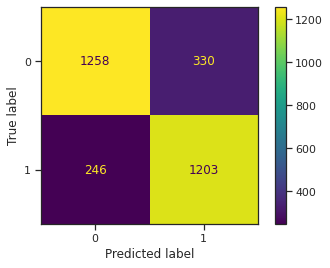

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, nn_predY, labels=neural_net.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=neural_net.classes_)
disp.plot();

According to the plot, the neural network achieved an accuracy of 80.70 percent.  The model accurately predicted 1259 false positives/unconfirmed exoplanets correctly, and 1203 exoplanets that are actually exoplanet candidates according to the Kepler data.  The model incorrectly predicted 246 exoplanets that are actually not exoplanets, and incorrectly classified only 330 actual exoplanets as false positives/unconfirmed exoplanets.   

Plotting a ROC curve (performance validation)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, nn_predY)
auc = roc_auc_score(y_test, nn_predY)

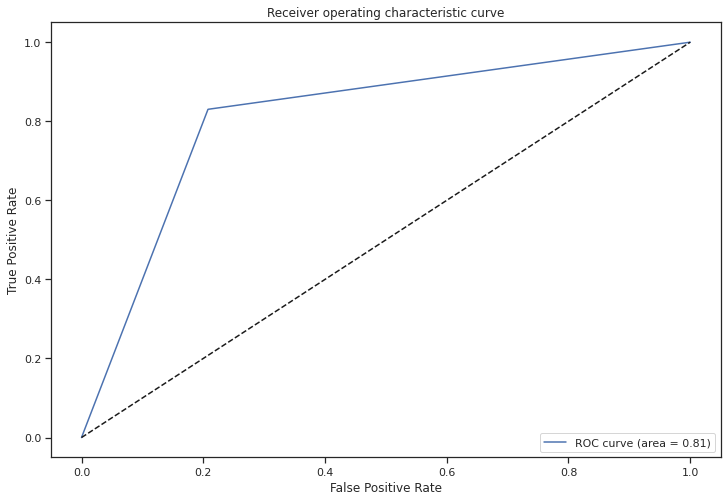

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve, Kepler Data')
plt.legend(loc="lower right")
plt.show()

The ROC curve indicates that the model is very good at predicting exoplanet candidates based on the Kepler planetary data.  The AUC for this ROC curve is 0.81, indicating that it is a strong model with a high true positive rate.

### Testing With ONLY Star Characteristics:

In [ ]:
x_norm

,orbital_period,impact_parameter,transit_duration,transit_depth,planetary_radius,equilibrium_temperature,insolation_flux,solar_effective_temp,stellar_surface_gravity,solar_radius,log_transit_duration,log_orbital_period
0,0.000071,0.001448,0.020980,0.000400,0.000011,0.052452,8.548941e-06,0.211107,0.831296,0.003560,0.512300,0.278104
1,0.000417,0.005813,0.032169,0.000568,0.000014,0.028548,8.321493e-07,0.211107,0.831296,0.003560,0.565711,0.410480
2,0.000151,0.009613,0.012494,0.007025,0.000072,0.041866,3.589843e-06,0.241179,0.845778,0.003303,0.448087,0.334235
3,0.000012,0.012658,0.017001,0.005241,0.000167,0.093566,8.147573e-05,0.237552,0.849539,0.002968,0.486157,0.149423
4,0.000018,0.006954,0.011571,0.000391,0.000013,0.094318,8.459972e-05,0.254628,0.825842,0.004077,0.438661,0.177794
...,...,...,...,...,...,...,...,...,...,...,...,...
9196,0.000064,0.007589,0.034328,0.000057,0.000005,0.061740,1.611319e-05,0.224934,0.799135,0.004260,0.573855,0.270567
9197,0.000002,0.012420,0.022891,0.001025,0.000146,0.140896,4.110991e-04,0.224934,0.842957,0.003455,0.523164,0.059133
9198,0.000012,0.000427,0.022110,0.000031,0.000003,0.108114,1.448552e-04,0.261277,0.826970,0.004012,0.518838,0.149550
9199,0.000003,0.001458,0.005871,0.000067,0.000005,0.149775,5.218892e-04,0.265357,0.827534,0.004056,0.356441,0.078506


In [ ]:
x_norm_star = x_norm[["insolation_flux","solar_effective_temp", "stellar_surface_gravity", "solar_radius"]]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_norm_star, y, test_size = 0.33)

In [ ]:
zr = DummyClassifier()
zeroR = zr.fit(x_train, y_train)
zr_predY = zeroR.predict(x_test)

zr_acc = accuracy_score(y_test, zr_predY)
print("ZeroR accuracy {:.2f}".format(zr_acc))

xdata = x_norm_star.values
zr_cv = cross_val_score(zr, xdata, y, cv = 10, scoring = 'accuracy')
print("{}: {:.2f}% ({:.2f})".format("ZR Average CV Score", zr_cv.mean()*100, zr_cv.std()))

ZeroR accuracy 0.75
ZR Average CV Score: 75.09% (0.00)


Neural Network Training and validation:

In [ ]:
mlp = MLPClassifier(max_iter = 500)
neural_net = mlp.fit(x_norm, y)
nn_predY = mlp.predict(x_norm)

nn_acc = accuracy_score(y, nn_predY)
print("Neural Network accuracy {:.2f}%".format(zr_acc))

xdata = x_norm_star.values
nn_cv = cross_val_score(mlp, xdata, y, cv = 10, scoring = 'accuracy')
print("{}: {:.2f}% ({:.2f})".format("NN Average CV Score", nn_cv.mean()*100, nn_cv.std()))

Neural Network accuracy 0.75%


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


NN Average CV Score: 75.00% (0.00)


The neural network performs slightly better than the dummyclassifier.

In [ ]:
mlp = MLPClassifier(solver = "adam", max_iter = 500, learning_rate_init=0.01)
neural_net = mlp.fit(x_train, y_train)
nn_predY = mlp.predict(x_test)

nn_acc = accuracy_score(y_test, nn_predY)
print("Neural Network accuracy {:.2f}%".format(zr_acc))

xdata = x_norm_star.values
nn_cv = cross_val_score(mlp, xdata, y, cv = 10, scoring = 'accuracy')
print("{}: {:.2f}% ({:.2f})".format("NN Average CV Score", nn_cv.mean()*100, nn_cv.std()))

Neural Network accuracy 0.75%
NN Average CV Score: 75.09% (0.01)


Let's plot the accuracy of the neural network via a confusion matrix.

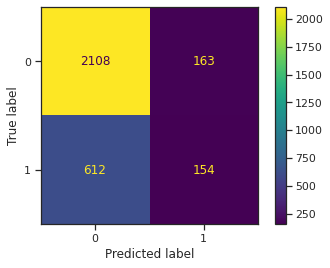

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, nn_predY, labels=neural_net.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=neural_net.classes_)
disp.plot();

According to the plot, the neural network achieved an accuracy of 75.21 percent.  The model accurately predicted 2171 false positives/unconfirmed exoplanets correctly, and 100 exoplanets that are actually exoplanets according to the NASA data.  The model incorrectly predicted 101 exoplanets that are actually not exoplanets, and incorrectly classified 665 actual exoplanets as false positives/unconfirmed exoplanets.   

Plotting a ROC curve (performance validation)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, nn_predY)
auc = roc_auc_score(y_test, nn_predY)

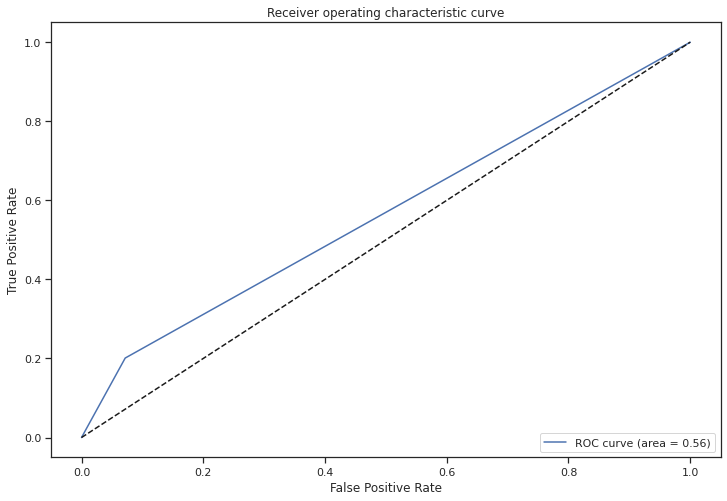

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve, Star Characteristics ONLy Features')
plt.legend(loc="lower right")
plt.show()

This model is not very good for predicting exoplanets based on star characteristics.

### Testing with ONLY Planet Characteristics:

In [ ]:
x_norm_planet = x_norm.drop(["insolation_flux","solar_effective_temp", "stellar_surface_gravity", "solar_radius"], axis = 1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_norm_planet, y, test_size = 0.33)

In [ ]:
zr = DummyClassifier()
zeroR = zr.fit(x_train, y_train)
zr_predY = zeroR.predict(x_test)

zr_acc = accuracy_score(y_test, zr_predY)
print("ZeroR accuracy {:.2f}".format(zr_acc))

xdata = x_norm_planet.values
zr_cv = cross_val_score(zr, xdata, y, cv = 10, scoring = 'accuracy')
print("{}: {:.2f}% ({:.2f})".format("ZR Average CV Score", zr_cv.mean()*100, zr_cv.std()))

ZeroR accuracy 0.75
ZR Average CV Score: 75.09% (0.00)


Neural Network Training and validation:

In [ ]:
mlp = MLPClassifier(max_iter = 500)
neural_net = mlp.fit(x_norm_planet, y)
nn_predY = mlp.predict(x_norm_planet)

nn_acc = accuracy_score(y, nn_predY)
print("Neural Network accuracy {:.2f}%".format(zr_acc))

xdata = x_norm_planet.values
nn_cv = cross_val_score(mlp, xdata, y, cv = 10, scoring = 'accuracy')
print("{}: {:.2f}% ({:.2f})".format("NN Average CV Score", nn_cv.mean()*100, nn_cv.std()))

Neural Network accuracy 0.75%


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


NN Average CV Score: 78.95% (0.05)


The neural network performs slightly better than the dummyclassifier.

In [ ]:
mlp = MLPClassifier(solver = "adam", max_iter = 500, learning_rate_init=0.01)
neural_net = mlp.fit(x_train, y_train)
nn_predY = mlp.predict(x_test)

nn_acc = accuracy_score(y_test, nn_predY)
print("Neural Network accuracy {:.2f}%".format(zr_acc))

xdata = x_norm_planet.values
nn_cv = cross_val_score(mlp, xdata, y, cv = 10, scoring = 'accuracy')
print("{}: {:.2f}% ({:.2f})".format("NN Average CV Score", nn_cv.mean()*100, nn_cv.std()))

Neural Network accuracy 0.75%
NN Average CV Score: 80.55% (0.05)


Let's plot the accuracy of the neural network via a confusion matrix.

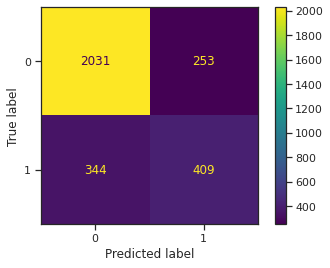

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, nn_predY, labels=neural_net.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=neural_net.classes_)
disp.plot();

According to the plot, the neural network achieved an accuracy of 80.55 percent.  The model accurately predicted 2031 false positives/unconfirmed exoplanets correctly, and 409 exoplanets that are actually exoplanets according to the NASA data.  The model incorrectly predicted 344 exoplanets that are actually not exoplanets, and incorrectly classified 253 actual exoplanets as false positives/unconfirmed exoplanets.   

Plotting a ROC curve (performance validation)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, nn_predY)
auc = roc_auc_score(y_test, nn_predY)

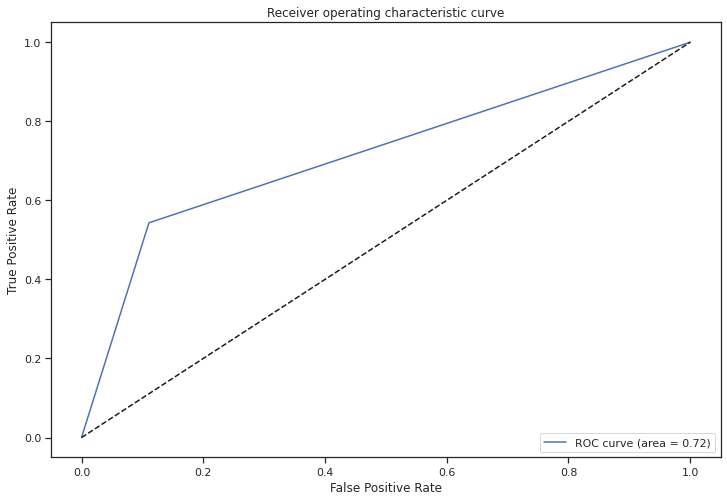

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve, Planetary ONLY Features')
plt.legend(loc="lower right")
plt.show()

## Conclusion


In conclusion, we have tested a number of different theories about whether star type matters when it comes to predicting whether an object in space (that has a transit duration, orbital period, and other exoplanet-like characteristics) is actually an exoplanet - and find that it is not a great predictor of whether an object is an exoplanet or not. In fact, the model where exoplanet characteristics are included significantly outperforms the model that ONLY uses star characteristics - indicating that star characteristics do not necessarily matter in the case of finding new exoplanets.  

HOWEVER - I see this is a good thing. Knowing what DOESN'T matter is just as good as knowing what does.  We now know that exoplanets can likely exist around any star - given the fact that there is no extractable pattern from the solar data that we do have in the Kepler files.  Also, we know that planetary observations matter a lot, as given by the Kepler candidate status and the model where I tested only planet characteristics.  Both of those models scored highly with a ROC curve score of 0.81 AUC and 0.72 AUC, respectively.  

An additional point: Both stellar and planetary data have a high variance, but the planets that were classified as exoplanets by NASA and the neural network were subsections of the full data that tended to have lower variance in terms of their observations.  This is likely due to the fact that the unconfirmed/non-exoplanet objects are objects that belong in a different group, i.e. not exoplanets.  So these observations could have the potential to skew the results.  

Further work for this study:  I think looking into further conbinations of data regarding planetary characteristics would be cool for this study.  I also think that looking deeper into the star connection would be interesting, but I couldn't really make it work in this project, so doing more with that would be cool in my opinion.

Data Sources: 

- Star Dataset:  https://www.kaggle.com/datasets/deepu1109/star-dataset
- Exoplanet Archive: https://www.kaggle.com/datasets/nasa/kepler-exoplanet-search-results